# Vectorization Exercise

$X = N \times d$ matrix. $w = d$-dimensional vector. 

* $X^{(i)}$ denotes the $i$'th row of the matrix $X$.
* $X_j$ denotes the $j$'th column of the matrix $X$.
* $X^{(i)}_j$ denotes the $j$'th item of $i$'th row of matrix $X$.


$y$ is defined as:

$$y = \frac{1}{N}\sum_{i=1}^N \sum_{j=1}^d w_j X_j^{(i)}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
X = np.arange(30).reshape(10, 3)  # 10 X 3 matrix
w = np.random.rand(3)  # 3-dimensional vector

X, w

(array([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]),
 array([0.455754  , 0.2891806 , 0.01311392]))

In [3]:
# for loop approach
N = 10
d = 3

sum2 = 0
for i in range(N):
    sum1 = 0
    for j in range(d):
        sum1 += w[j] * X[i][j]
    sum2 += sum1

y = (1/N) * sum2

y

10.549063489020378

In [4]:
# second approach
N = 10
d = 3

sum2 = 0
for i in range(N):
    sum1 = np.dot(X[i], w)  # X[i].shape = (3,)  # w.shape = (3,)
    sum2 += sum1

y = (1/N) * sum2
y

10.549063489020378

In [5]:
X.shape, w.shape

((10, 3), (3,))

In [6]:
# N x M   @   M x k   =  N x k
# N x M   @   M x 2   =  N x 2

y = np.dot(X, w)

print(y.shape)

y.mean()

(10,)


10.54906348902038

# Gradient Descent Exercise

## sigmoid function

This is used for logistic regression. Defined as: 
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

It's derivative is defined as: 
$$
\frac{d}{d\sigma} = \sigma(x)(1-\sigma(x))
$$

In [7]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

0.5


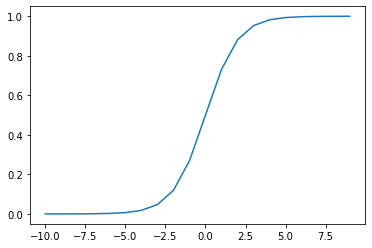

In [8]:
x = np.arange(-10, 10)
plt.plot(x, sigmoid(x));
print(sigmoid(0))

## Data definition

In [9]:
df = pd.read_csv("./titanic/train.csv")

# preprocess some columns
df.fillna(0, inplace=True)
df["Sex"] = df["Sex"] == "male"
df.loc[df["Embarked"] == "S", "Embarked"] = 1
df.loc[df["Embarked"] == "C", "Embarked"] = 2
df.loc[df["Embarked"] == "Q", "Embarked"] = 3
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",True,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",False,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",True,35.0,0,0,373450,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",True,27.0,0,0,211536,13.0000,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",False,19.0,0,0,112053,30.0000,B42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",False,0.0,1,2,W./C. 6607,23.4500,0,1
889,890,1,1,"Behr, Mr. Karl Howell",True,26.0,0,0,111369,30.0000,C148,2


## Extract Features and Target

In [10]:
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].to_numpy()

# normalize to -1~1 range
s = MinMaxScaler((-1, 1))
X = s.fit_transform(X)

X.shape

(891, 7)

array([[ 1.        ,  1.        , -0.45      , ..., -1.        ,
        -0.97169788, -0.33333333],
       [-1.        , -1.        , -0.05      , ..., -1.        ,
        -0.72172853,  0.33333333],
       [ 1.        , -1.        , -0.35      , ..., -1.        ,
        -0.96906286, -0.33333333],
       ...,
       [ 1.        , -1.        , -1.        , ..., -0.33333333,
        -0.9084573 , -0.33333333],
       [-1.        ,  1.        , -0.35      , ..., -1.        ,
        -0.8828878 ,  0.33333333],
       [ 1.        ,  1.        , -0.2       , ..., -1.        ,
        -0.96974601,  1.        ]])

In [11]:
y = df["Survived"].to_numpy()
y = np.expand_dims(y, axis=1)
y.shape

(891, 1)

sigmoid(X * w)  = y_hat

y_hat 과 y 가 가장 비슷하게 되도록 w 를 학습 시켜랴.

## Loss term
$$
L_{\theta} = \frac{1}{2N} \sum_{i=1}^N (y_i - \hat{y_i})^2
$$
Where
$$
z = w^T x_i, \quad \hat{y_i} = \sigma(z) \tag{1}
$$

You can get the derivative as:
$$
\frac{dL}{dw} = \frac{dL}{\hat{y_i}}\frac{\hat{y_i}}{d\sigma}\frac{d\sigma}{dz}\frac{dz}{w}
$$

The derivative is calculated as:
$$
\delta(w) = -\frac{dL}{dw} = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y_i})\hat{y_i}(1 - \hat{y_i}) x_i \tag{2}
$$

Then, update the $w$ as:
$$
w = w + \alpha \delta(w) \tag{3}
$$
where $\alpha$ is the learning rate.

The task is to vectorize above equation.


## Single Layer Neural Network

In [34]:
class model:
    def __init__(self, shape, lr=1):
        self.W = np.random.rand(*shape)
        self.lr = lr
    
    def forward(self, X):
        # Task 1: vectorize forward pass: equation (1) above.
        # X = (891, 7) = N x d matrix
        # w = (7, 1) = d x 1 vector
        # z = (891, 1)
        # dot product, element-wise product
        z = X @ self.W  # np.dot(X, self.W)  # z = (891, 1)
        y_hat = sigmoid(z)  # y_hat.shape = (891, 1)
        return y_hat
    
    def backward(self, X, y, y_hat):
        # Task 2: vectorize backward pass: equation (2) above.
        # y = (891, 1)
        # y_hat  = (891, 1)
        # x = (891, 7)

        # w = (7, 1)
        # dw = (7, 1)

        dw = ((y - y_hat) * y_hat * (1 - y_hat) * X).mean(axis=0)
        dw = np.expand_dims(dw, axis=1)
        # dw.shape == w.shape = (7,1)
        # update w: equation (3) above.
        # w = w + learning rate * dw
        self.W = self.W + self.lr * dw


In [35]:
def mse_loss(y, y_hat):
    return np.mean(np.square(y - y_hat)) / 2

## Training Loop

Loss at epoch 0: 0.17972702644269772
accuracy:  0.3894500561167228

(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
Loss at epoch 10: 0.14008785484931366
accuracy:  0.5959595959595959

(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
Loss at epoch 20: 0.11028055199647811
accuracy:  0.6285072951739619

(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
Loss at epoch 30: 0.090180694318401
accuracy:  0.7598204264870931

(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
(891, 1)
Loss at

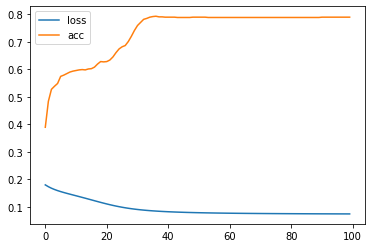

In [36]:
m = model((X.shape[1], 1))
loss = []
acc = []
epochs = 100
for i in range(epochs):
    y_hat = m.forward(X)
    pred = y_hat >= 0.5

    loss.append(mse_loss(y, y_hat))
    acc.append(np.count_nonzero(pred == y) / y.shape[0])

    if i % 10 == 0:
        print(f"Loss at epoch {i}: {loss[-1]}")
        print("accuracy: ", acc[-1])
        print()

    m.backward(X, y, y_hat)

plt.plot(loss, label="loss")
plt.plot(acc, label="acc")
plt.legend();

## Prediction Demo

In [10]:
(m.forward(X[:10]) >= 0.5).astype(np.int16), y[:10]

(array([[0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1]], dtype=int16),
 array([[0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1]]))